In [48]:
import pandas as pd

In [49]:
from wordcloud import WordCloud

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron

In [51]:
file_path = "C:\\Users\\agrim\\Python_Projects\\AI_Learning-Research\\Spam Classification\\SMSSpamCollection (1).txt"

df = pd.read_table(file_path, sep = '\t', header = None)

In [52]:
df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)
df.head()

,0,1
0,ham,Raji..pls do me a favour. Pls convey my Birthd...
1,ham,Ok lor then we go tog lor...
2,ham,Nice line said by a broken heart- Plz don't cu...
3,ham,Thanx 4 sending me home...
4,ham,HARD BUT TRUE: How much you show &amp; expres...


In [53]:
df.rename(columns={0: 'label', 1:'sms_message'}, inplace=True)
df.head()

,label,sms_message
0,ham,Raji..pls do me a favour. Pls convey my Birthd...
1,ham,Ok lor then we go tog lor...
2,ham,Nice line said by a broken heart- Plz don't cu...
3,ham,Thanx 4 sending me home...
4,ham,HARD BUT TRUE: How much you show &amp; expres...


In [54]:
df['label'] = df['label'].replace('ham',0)
df['label'] = df['label'].replace('spam',1)
df.head()

,label,sms_message
0,0,Raji..pls do me a favour. Pls convey my Birthd...
1,0,Ok lor then we go tog lor...
2,0,Nice line said by a broken heart- Plz don't cu...
3,0,Thanx 4 sending me home...
4,0,HARD BUT TRUE: How much you show &amp; expres...


In [55]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df['sms_message'], df['label'], random_state =42)

X_train_sms.head()

4281                             You need to get up. Now.
585                                                 G.W.R
4545    So how's scotland. Hope you are not over showi...
3034          Great! So what attracts you to the brothas?
2758                   Pls speak to that customer machan.
Name: sms_message, dtype: object

In [56]:
count_vector = CountVectorizer(ngram_range = (1,1), lowercase = True, stop_words = 'english')

In [57]:
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()

In [58]:
X_train_feature_list = count_vector.get_feature_names_out()
print(X_train_feature_list)

['00' '000' '000pes' ... 'èn' 'ú1' '〨ud']


In [59]:
frequencey_matrix_X_train = pd.DataFrame(X_train, columns = X_train_feature_list)
frequencey_matrix_X_train.head()

,00,000,000pes,008704050406,0089,0121,01223585334,0125698789,02,0207,...,zed,zeros,zhong,zindgi,zoe,zouk,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
MNB = MultinomialNB()
MNB.fit(X_train,Y_train)

MultinomialNB()

In [61]:
predictions = MNB.predict(X_test)

In [62]:
accuracy_score(predictions,Y_test)

0.9806173725771715

In [63]:
precision_score(predictions, Y_test)

0.9120879120879121

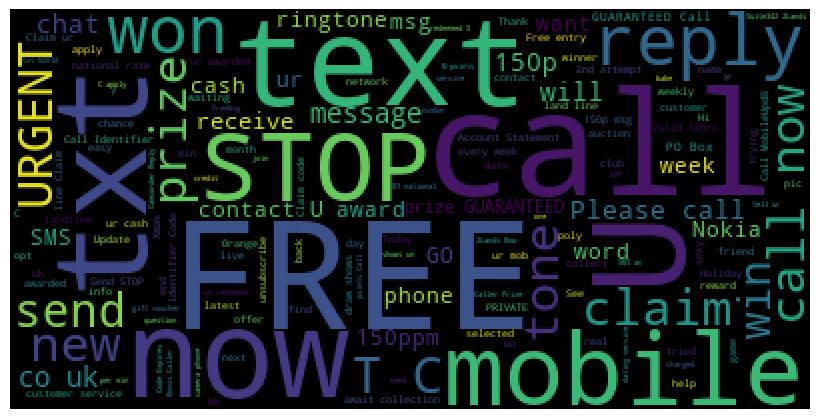

In [64]:
spam_words = ' '.join(X_train_sms[Y_train == 1])
wordcloud = WordCloud( max_words=150).generate(spam_words)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

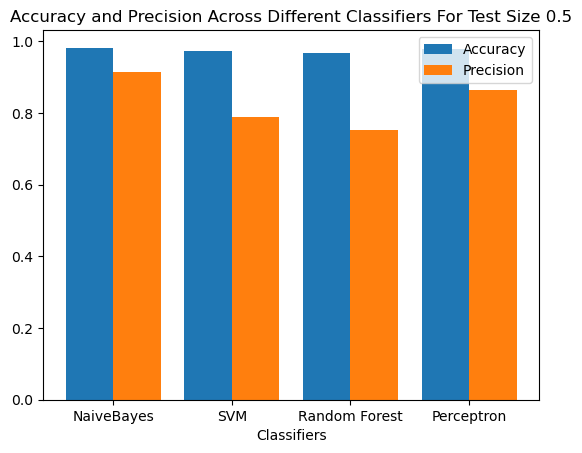

In [65]:
SVM = SVC(kernel = 'rbf')
RF = RandomForestClassifier()
P = Perceptron(random_state = 42)


X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df['sms_message'], df['label'], test_size = 0.5, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)

NB_accuracy = accuracy_score(MNB.predict(X_test), Y_test)
NB_precision = precision_score(MNB.predict(X_test), Y_test)
SVM_accuracy= accuracy_score(SVM.predict(X_test), Y_test)
SVM_precision = precision_score(SVM.predict(X_test), Y_test)
Random_Forest_accuracy =accuracy_score(RF.predict(X_test), Y_test)
Random_Forest_precision = precision_score(RF.predict(X_test), Y_test)
P_accuracy =accuracy_score(P.predict(X_test), Y_test)
P_precision = precision_score(P.predict(X_test), Y_test)

  
X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision Across Different Classifiers For Test Size 0.5")
plt.legend()
plt.show()


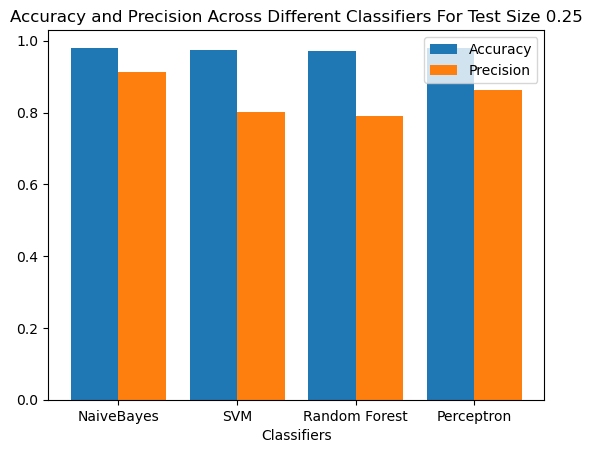

In [66]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df['sms_message'], df['label'], test_size = 0.25, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)


NB_accuracy = accuracy_score(MNB.predict(X_test), Y_test)
NB_precision = precision_score(MNB.predict(X_test), Y_test)
SVM_accuracy= accuracy_score(SVM.predict(X_test), Y_test)
SVM_precision = precision_score(SVM.predict(X_test), Y_test)
Random_Forest_accuracy =accuracy_score(RF.predict(X_test), Y_test)
Random_Forest_precision = precision_score(RF.predict(X_test), Y_test)
P_accuracy =accuracy_score(P.predict(X_test), Y_test)
P_precision = precision_score(P.predict(X_test), Y_test)


X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision Across Different Classifiers For Test Size 0.25")
plt.legend()
plt.show()

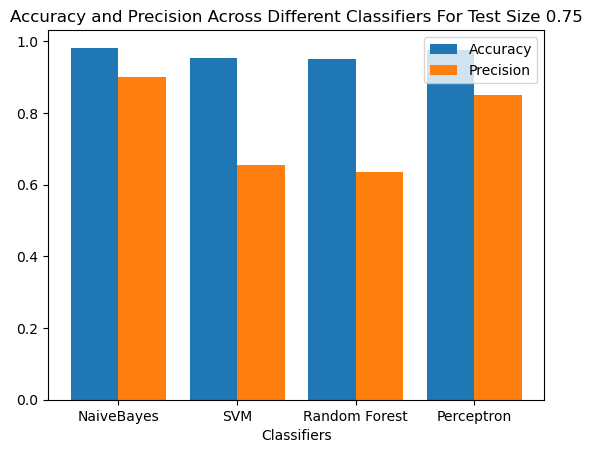

In [67]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df['sms_message'], df['label'], test_size = 0.75, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)


NB_accuracy = accuracy_score(MNB.predict(X_test), Y_test)
NB_precision = precision_score(MNB.predict(X_test), Y_test)
SVM_accuracy= accuracy_score(SVM.predict(X_test), Y_test)
SVM_precision = precision_score(SVM.predict(X_test), Y_test)
Random_Forest_accuracy =accuracy_score(RF.predict(X_test), Y_test)
Random_Forest_precision = precision_score(RF.predict(X_test), Y_test)
P_accuracy =accuracy_score(P.predict(X_test), Y_test)
P_precision = precision_score(P.predict(X_test), Y_test)


X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision Across Different Classifiers For Test Size 0.75")
plt.legend()
plt.show()

In [68]:
X = count_vector.fit_transform(df['sms_message'])
Y = df['label']


In [69]:
kf = KFold(n_splits = 5)

Fold 0


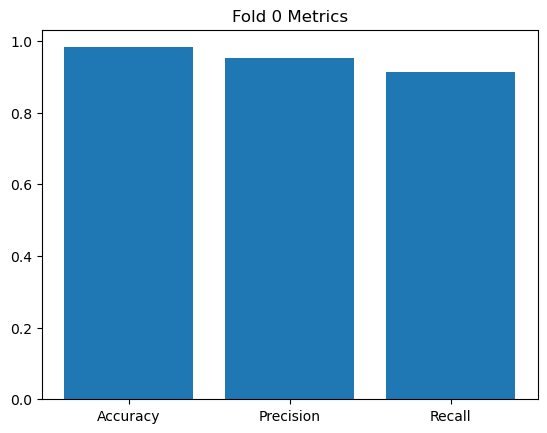

 Accuracy: 0.9820627802690582
 Precision: 0.9513888888888888


Fold 1


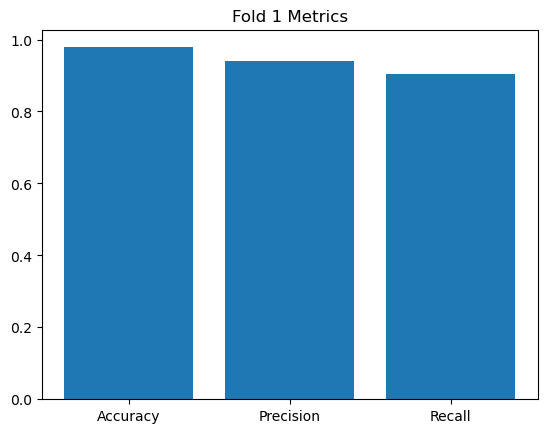

 Accuracy: 0.97847533632287
 Precision: 0.9403973509933775


Fold 2


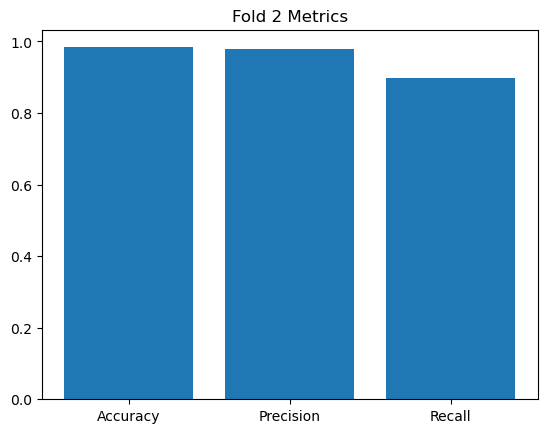

 Accuracy: 0.9838420107719928
 Precision: 0.9779411764705882


Fold 3


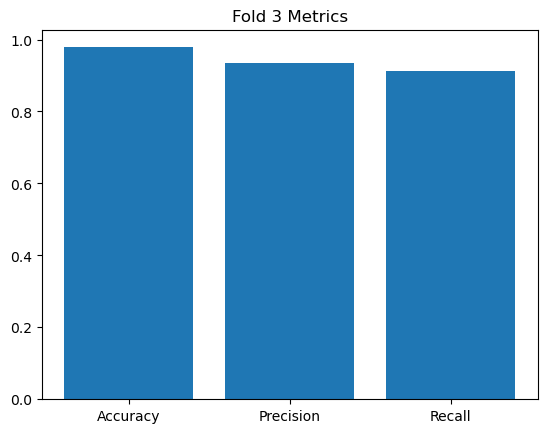

 Accuracy: 0.9784560143626571
 Precision: 0.9358974358974359


Fold 4


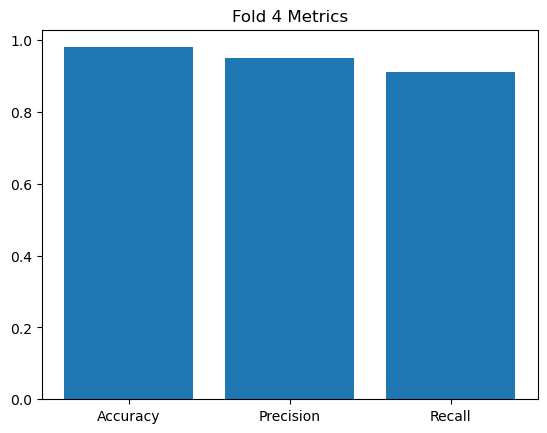

 Accuracy: 0.9793536804308797
 Precision: 0.95


 Mean Accuracy: 0.9804379644314916
 Mean Precision: 0.9511249704500581
 Mean Recall: 0.9078240442853319


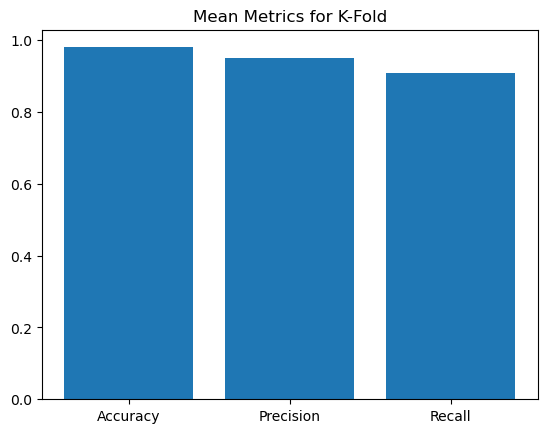

In [70]:
accuracy_list = []
precision_list = []
recall_list = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}")

    
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    MNB.fit(X_train,Y_train)
    KFPredict = MNB.predict(X_test)
    
    accuracy = accuracy_score(KFPredict,Y_test)
    precision = precision_score(KFPredict,Y_test)
    recall = recall_score(KFPredict, Y_test)
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    
    labels = ['Accuracy', 'Precision', 'Recall']
    counts = [accuracy, precision, recall]
    plt.bar(labels, counts)
    plt.title(f"Fold {i} Metrics")
    plt.show()
    
    
    print(f" Accuracy: {accuracy}")
    print(f" Precision: {precision}")
    print("\n")
    

mean_accuracy = mean(accuracy_list)
mean_precision = mean(precision_list)
mean_recall = mean(recall_list)
print(f" Mean Accuracy: {mean_accuracy}")
print(f" Mean Precision: {mean_precision}")
print(f" Mean Recall: {mean_recall}")

means = [mean_accuracy,mean_precision,mean_recall]

plt.bar(['Accuracy','Precision','Recall'],means)
plt.title("Mean Metrics for K-Fold")
plt.show()


Fold 0


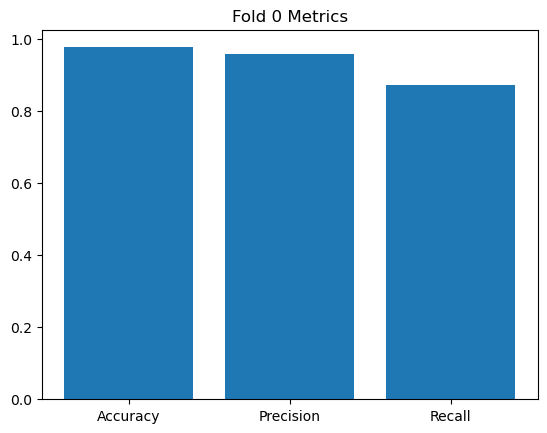

 Accuracy: 0.9767025089605734
 Precision: 0.9583333333333334


Fold 1


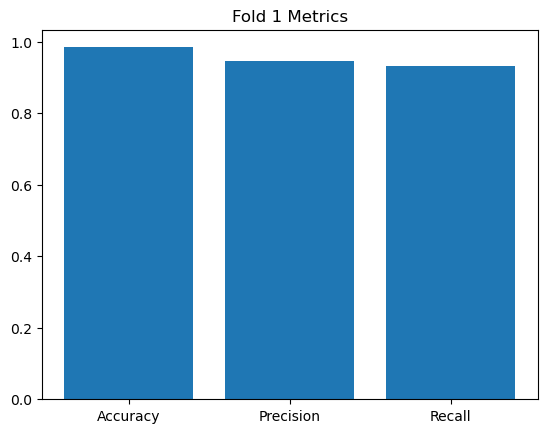

 Accuracy: 0.9838709677419355
 Precision: 0.9452054794520548


Fold 2


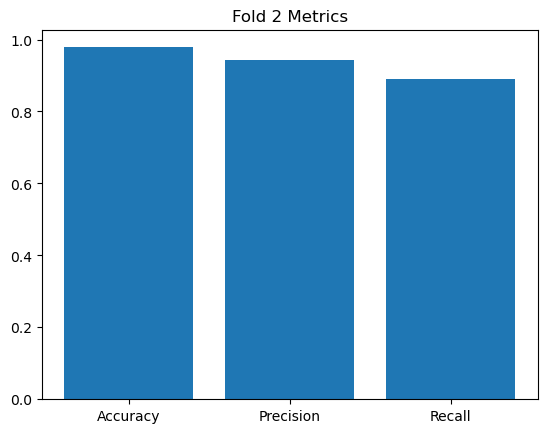

 Accuracy: 0.9784560143626571
 Precision: 0.9420289855072463


Fold 3


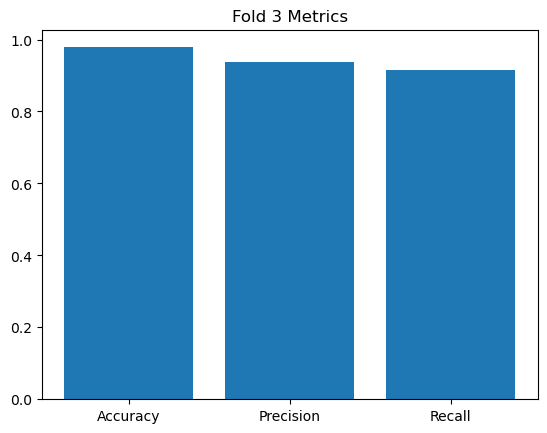

 Accuracy: 0.9784560143626571
 Precision: 0.9382716049382716


Fold 4


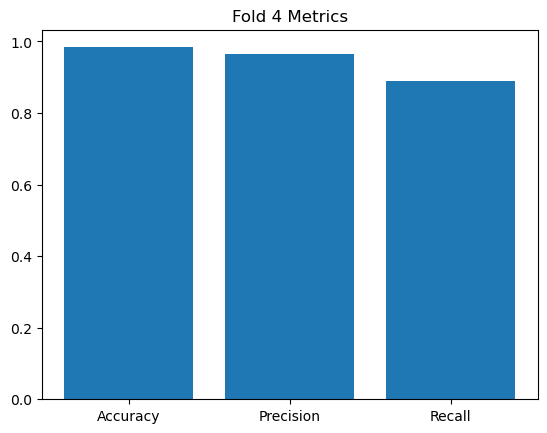

 Accuracy: 0.9838420107719928
 Precision: 0.9655172413793104


Fold 5


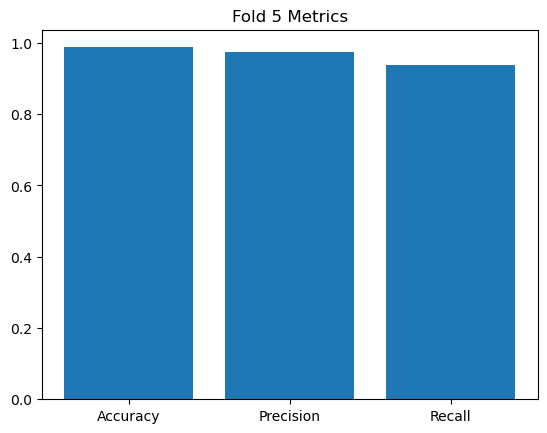

 Accuracy: 0.9874326750448833
 Precision: 0.9743589743589743


Fold 6


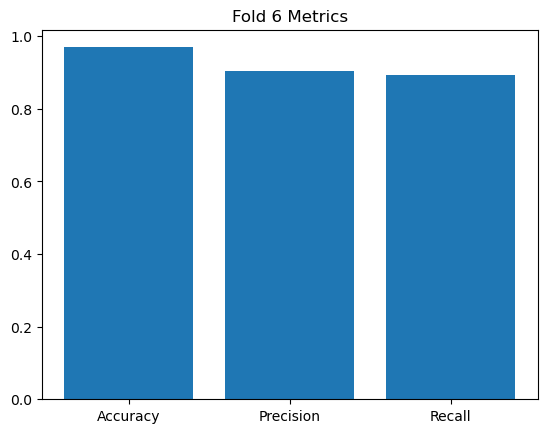

 Accuracy: 0.9694793536804309
 Precision: 0.9047619047619048


Fold 7


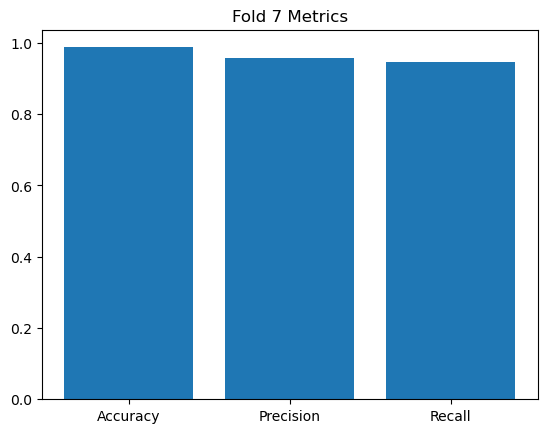

 Accuracy: 0.9874326750448833
 Precision: 0.9583333333333334


Fold 8


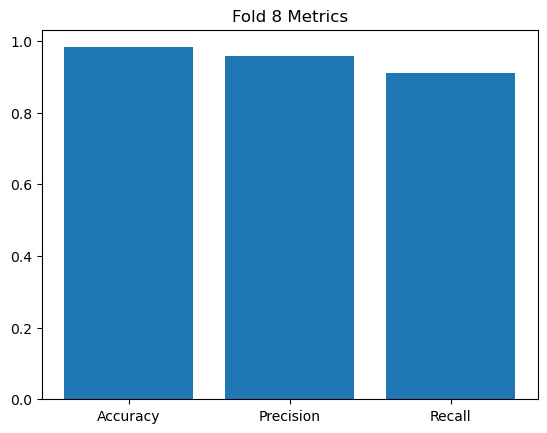

 Accuracy: 0.9820466786355476
 Precision: 0.958904109589041


Fold 9


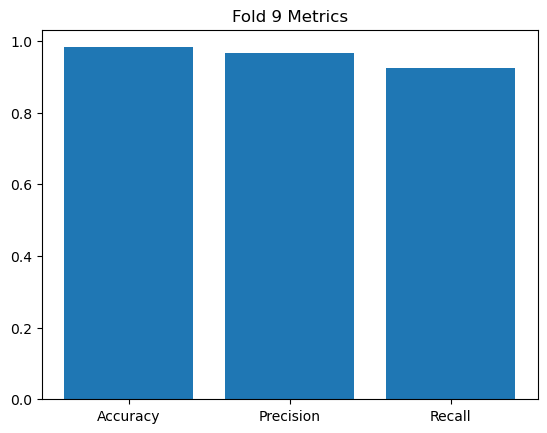

 Accuracy: 0.9820466786355476
 Precision: 0.9655172413793104


 Mean Accuracy: 0.9809765577241109
 Mean Precision: 0.951123220803278
 Mean Recall: 0.9099796958260313


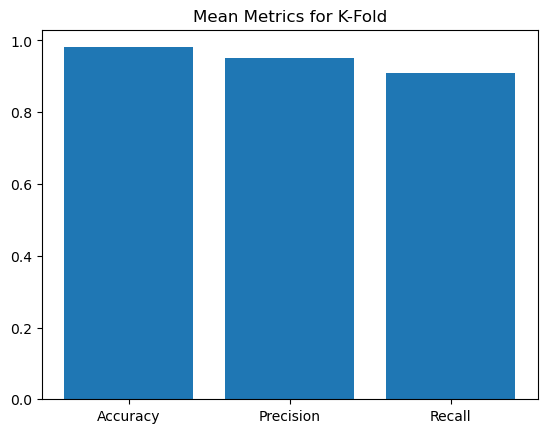

In [71]:
kf = KFold(n_splits = 10)


accuracy_list = []
precision_list = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}")

    
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    MNB.fit(X_train,Y_train)
    KFPredict = MNB.predict(X_test)
    
    accuracy = accuracy_score(KFPredict,Y_test)
    precision = precision_score(KFPredict,Y_test)
    recall = recall_score(KFPredict, Y_test)
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    
    labels = ['Accuracy', 'Precision', 'Recall']
    counts = [accuracy, precision, recall]
    plt.bar(labels, counts)
    plt.title(f"Fold {i} Metrics")
    plt.show()
    
    
    print(f" Accuracy: {accuracy}")
    print(f" Precision: {precision}")
    print("\n")
    

mean_accuracy = mean(accuracy_list)
mean_precision = mean(precision_list)
mean_recall = mean(recall_list)
print(f" Mean Accuracy: {mean_accuracy}")
print(f" Mean Precision: {mean_precision}")
print(f" Mean Recall: {mean_recall}")

means = [mean_accuracy,mean_precision,mean_recall]

plt.bar(['Accuracy','Precision','Recall'],means)
plt.title("Mean Metrics for K-Fold")
plt.show()

Fold 0


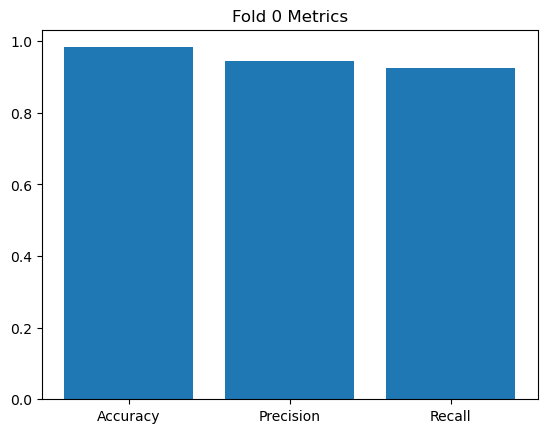

 Accuracy: 0.9829596412556054
 Precision: 0.9444444444444444


Fold 1


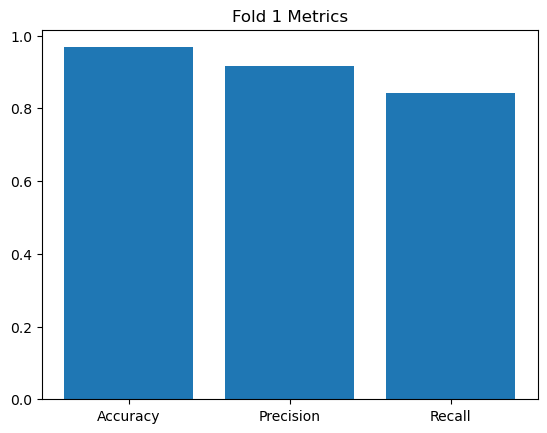

 Accuracy: 0.967713004484305
 Precision: 0.9148936170212766


Fold 2


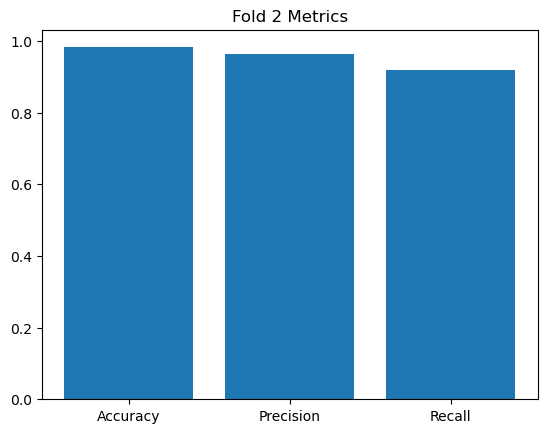

 Accuracy: 0.9820466786355476
 Precision: 0.9631901840490797


Fold 3


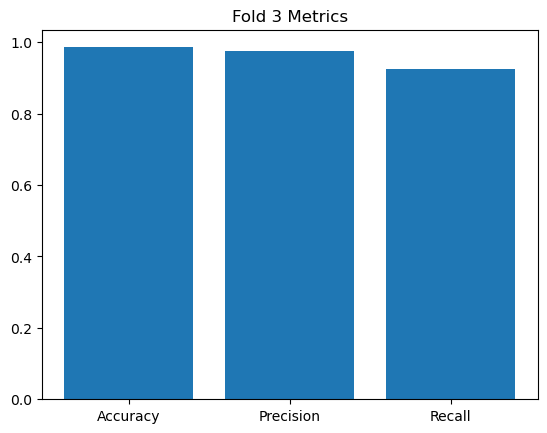

 Accuracy: 0.9856373429084381
 Precision: 0.974025974025974


Fold 4


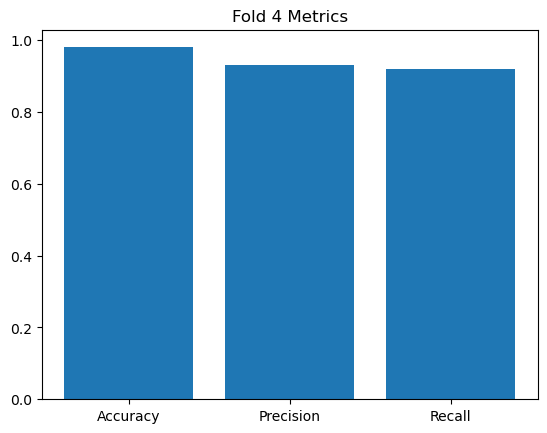

 Accuracy: 0.9802513464991023
 Precision: 0.9310344827586207


 Mean Accuracy: 0.9797216027565997
 Mean Precision: 0.9455177404598791
 Mean Recall: 0.9090212344077552


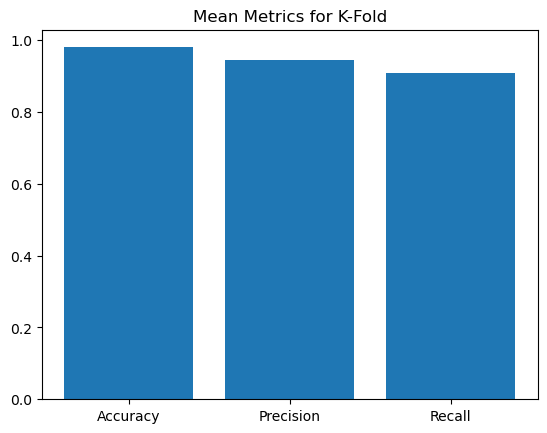

In [72]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)


accuracy_list = []
precision_list = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}")

    
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    MNB.fit(X_train,Y_train)
    KFPredict = MNB.predict(X_test)
    
    accuracy = accuracy_score(KFPredict,Y_test)
    precision = precision_score(KFPredict,Y_test)
    recall = recall_score(KFPredict, Y_test)
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    
    labels = ['Accuracy', 'Precision', 'Recall']
    counts = [accuracy, precision, recall]
    plt.bar(labels, counts)
    plt.title(f"Fold {i} Metrics")
    plt.show()
    
    
    print(f" Accuracy: {accuracy}")
    print(f" Precision: {precision}")
    print("\n")
    
   

mean_accuracy = mean(accuracy_list)
mean_precision = mean(precision_list)
mean_recall = mean(recall_list)
print(f" Mean Accuracy: {mean_accuracy}")
print(f" Mean Precision: {mean_precision}")
print(f" Mean Recall: {mean_recall}")

means = [mean_accuracy,mean_precision,mean_recall]

plt.bar(['Accuracy','Precision','Recall'],means)
plt.title("Mean Metrics for K-Fold")
plt.show()

Fold 0


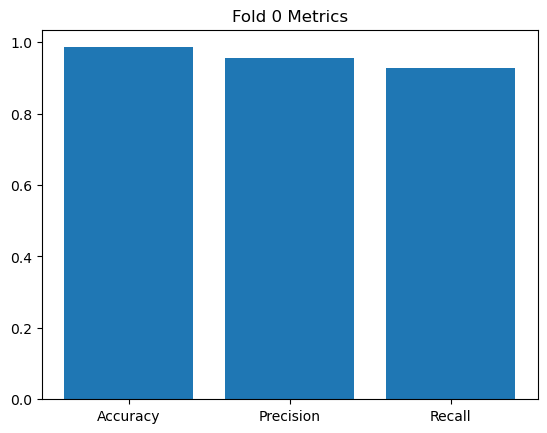

 Accuracy: 0.985663082437276
 Precision: 0.9545454545454546


Fold 1


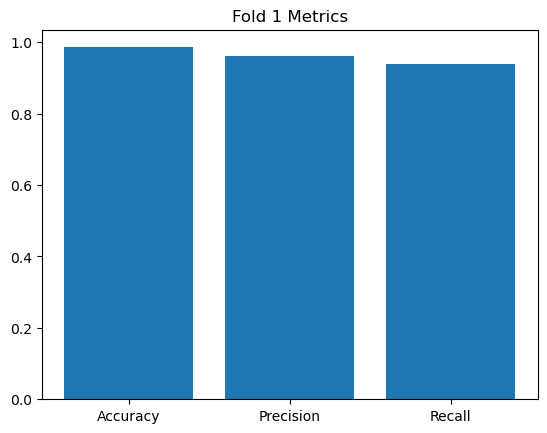

 Accuracy: 0.985663082437276
 Precision: 0.9615384615384616


Fold 2


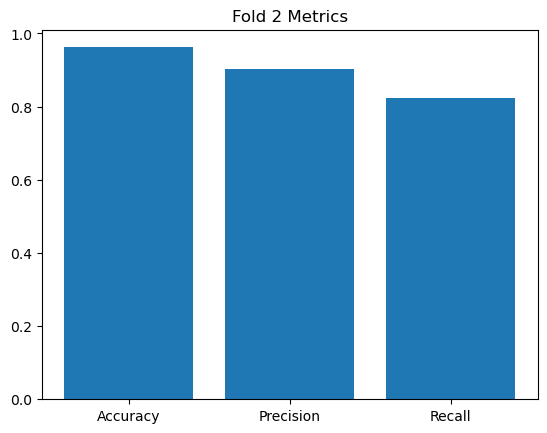

 Accuracy: 0.9622980251346499
 Precision: 0.9027777777777778


Fold 3


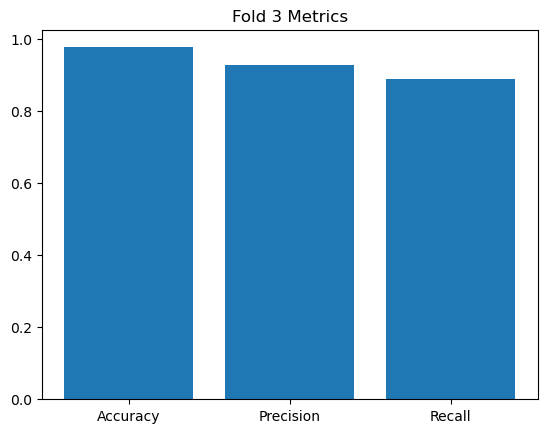

 Accuracy: 0.9766606822262118
 Precision: 0.927536231884058


Fold 4


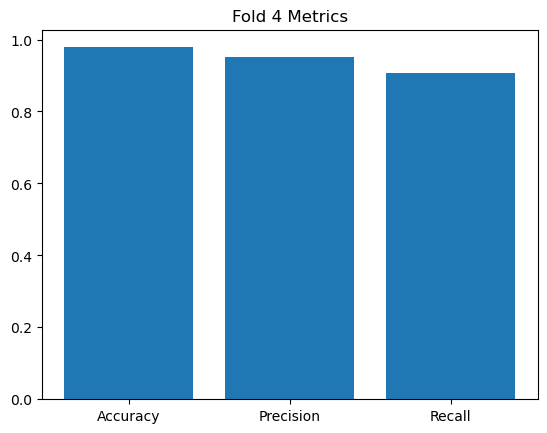

 Accuracy: 0.9784560143626571
 Precision: 0.9506172839506173


Fold 5


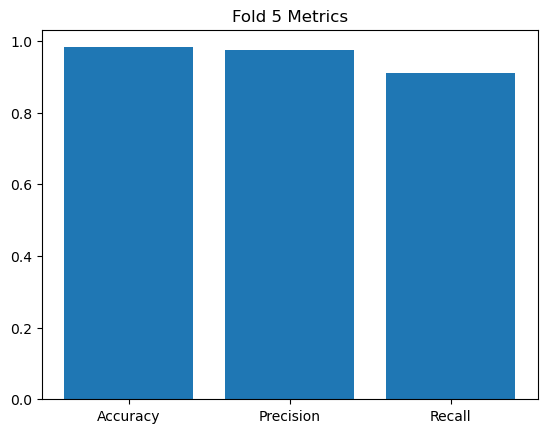

 Accuracy: 0.9820466786355476
 Precision: 0.975609756097561


Fold 6


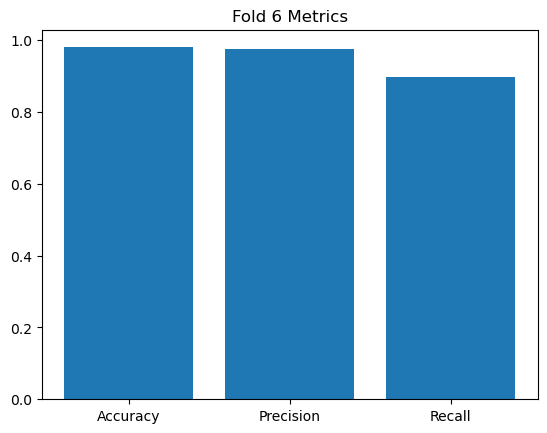

 Accuracy: 0.9802513464991023
 Precision: 0.9753086419753086


Fold 7


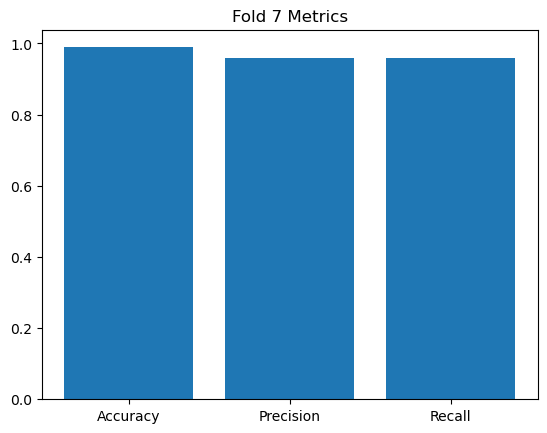

 Accuracy: 0.9892280071813285
 Precision: 0.958904109589041


Fold 8


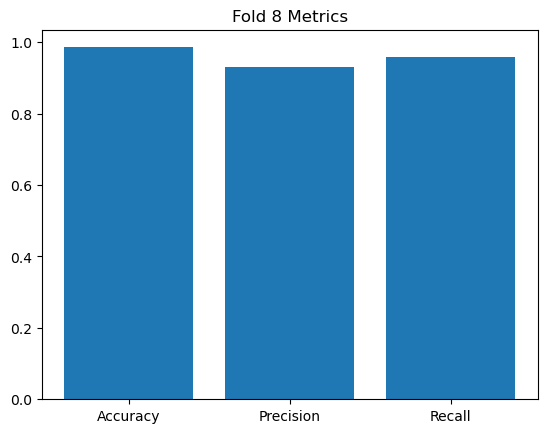

 Accuracy: 0.9856373429084381
 Precision: 0.9305555555555556


Fold 9


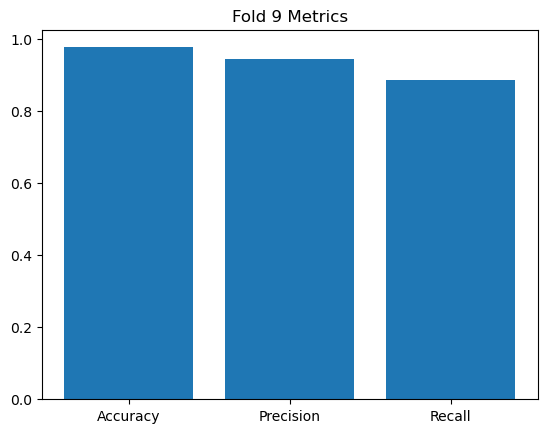

 Accuracy: 0.9766606822262118
 Precision: 0.9452054794520548


 Mean Accuracy: 0.98025649440487
 Mean Precision: 0.9482598752365891
 Mean Recall: 0.908981062050417


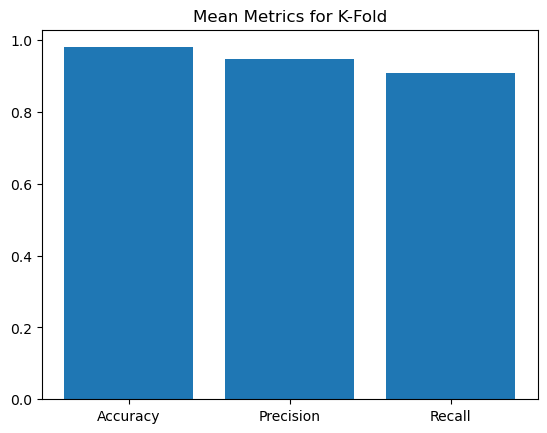

In [73]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)


accuracy_list = []
precision_list = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}")
    
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    MNB.fit(X_train,Y_train)
    KFPredict = MNB.predict(X_test)
    
    accuracy = accuracy_score(KFPredict,Y_test)
    precision = precision_score(KFPredict,Y_test)
    recall = recall_score(KFPredict, Y_test)
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    
    labels = ['Accuracy', 'Precision', 'Recall']
    counts = [accuracy, precision, recall]
    plt.bar(labels, counts)
    plt.title(f"Fold {i} Metrics")
    plt.show()
    
    
    print(f" Accuracy: {accuracy}")
    print(f" Precision: {precision}")
    print("\n")
    
 

mean_accuracy = mean(accuracy_list)
mean_precision = mean(precision_list)
mean_recall = mean(recall_list)
print(f" Mean Accuracy: {mean_accuracy}")
print(f" Mean Precision: {mean_precision}")
print(f" Mean Recall: {mean_recall}")

means = [mean_accuracy,mean_precision,mean_recall]

plt.bar(['Accuracy','Precision','Recall'],means)
plt.title("Mean Metrics for K-Fold")
plt.show()

In [74]:
imbalanced_file_path = "C:\\Users\\agrim\\Python_Projects\\AI_Learning-Research\\Spam Classification\\imbalanced_spam.csv"
df3 = pd.read_csv(imbalanced_file_path, encoding='latin-1')


df3 = df3.reindex(np.random.permutation(df3.index))
df3.reset_index(inplace=True, drop=True)
df3.head()

,label,email,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,Depends on individual lor e hair dresser say p...,NaN,NaN,NaN
1,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
2,ham,Goodmorning sleeping ga.,NaN,NaN,NaN
3,ham,Then. You are eldest know.,NaN,NaN,NaN
4,ham,Watching tv lor... Y she so funny we bluff her...,NaN,NaN,NaN


In [75]:
df3['label'] = df3['label'].replace('ham',0)
df3['label'] = df3['label'].replace('spam',1)
df3.head()

,label,email,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,Depends on individual lor e hair dresser say p...,NaN,NaN,NaN
1,0,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
2,0,Goodmorning sleeping ga.,NaN,NaN,NaN
3,0,Then. You are eldest know.,NaN,NaN,NaN
4,0,Watching tv lor... Y she so funny we bluff her...,NaN,NaN,NaN


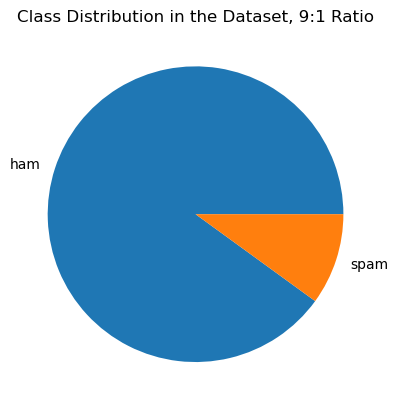

In [76]:
class_labels = ['ham','spam']
class_counts = [4500,500]
bar_colors = ['red','blue']
plt.pie(class_counts,labels = class_labels)
plt.title('Class Distribution in the Dataset, 9:1 Ratio')



plt.show()

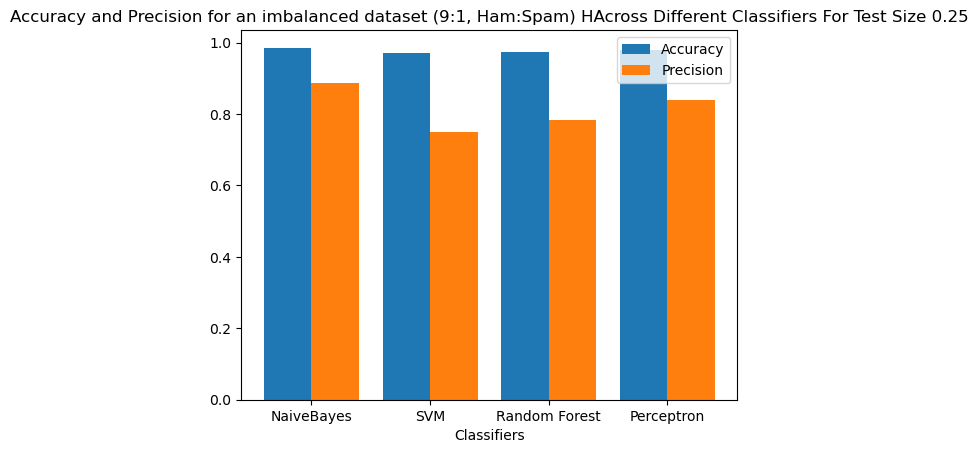

In [77]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df3['email'], df3['label'], test_size = 0.25, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)


NB_accuracy = accuracy_score(MNB.predict(X_test), Y_test)
NB_precision = precision_score(MNB.predict(X_test), Y_test)
SVM_accuracy= accuracy_score(SVM.predict(X_test), Y_test)
SVM_precision = precision_score(SVM.predict(X_test), Y_test)
Random_Forest_accuracy =accuracy_score(RF.predict(X_test), Y_test)
Random_Forest_precision = precision_score(RF.predict(X_test), Y_test)
P_accuracy =accuracy_score(P.predict(X_test), Y_test)
P_precision = precision_score(P.predict(X_test), Y_test)


X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision for an imbalanced dataset (9:1, Ham:Spam) HAcross Different Classifiers For Test Size 0.25")
plt.legend()
plt.show()

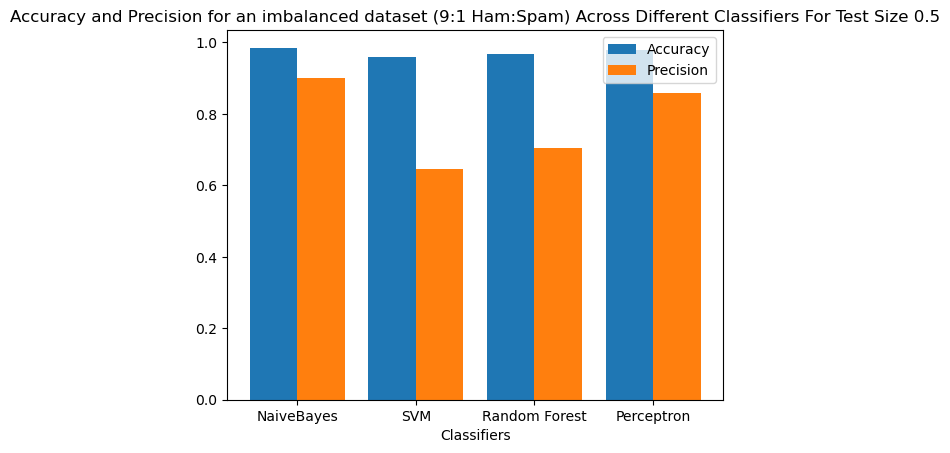

In [78]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df3['email'], df3['label'], test_size = 0.5, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)


NB_accuracy = accuracy_score(MNB.predict(X_test), Y_test)
NB_precision = precision_score(MNB.predict(X_test), Y_test)
SVM_accuracy= accuracy_score(SVM.predict(X_test), Y_test)
SVM_precision = precision_score(SVM.predict(X_test), Y_test)
Random_Forest_accuracy =accuracy_score(RF.predict(X_test), Y_test)
Random_Forest_precision = precision_score(RF.predict(X_test), Y_test)
P_accuracy =accuracy_score(P.predict(X_test), Y_test)
P_precision = precision_score(P.predict(X_test), Y_test)


X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision for an imbalanced dataset (9:1 Ham:Spam) Across Different Classifiers For Test Size 0.5")
plt.legend()
plt.show()

In [ ]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df3['email'], df3['label'], test_size = 0.75, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)


NB_accuracy = accuracy_score(MNB.predict(X_test), Y_test)
NB_precision = precision_score(MNB.predict(X_test), Y_test)
SVM_accuracy= accuracy_score(SVM.predict(X_test), Y_test)
SVM_precision = precision_score(SVM.predict(X_test), Y_test)
Random_Forest_accuracy =accuracy_score(RF.predict(X_test), Y_test)
Random_Forest_precision = precision_score(RF.predict(X_test), Y_test)
P_accuracy =accuracy_score(P.predict(X_test), Y_test)
P_precision = precision_score(P.predict(X_test), Y_test)


X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision for an imbalanced dataset (9:1 Ham:Spam) Across Different Classifiers For Test Size 0.75")
plt.legend()
plt.show()